In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
path = 'C:/Users/Administrator/PycharmProjects/ARIMA_TimeSeries/dataset.txt'
df = pd.read_csv(path)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 3.145186
p-value: 1.000000


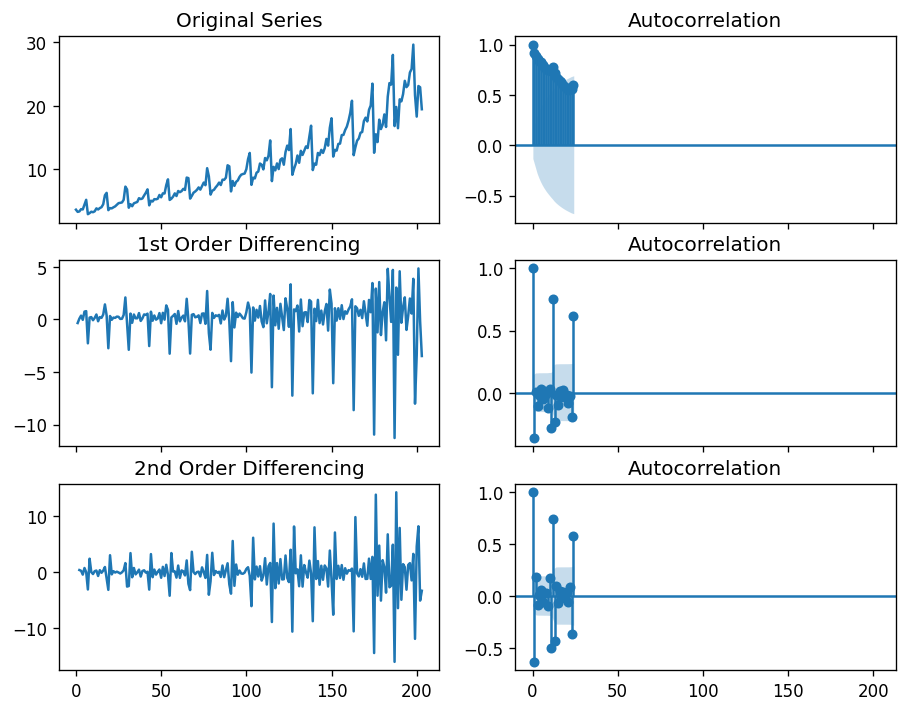

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


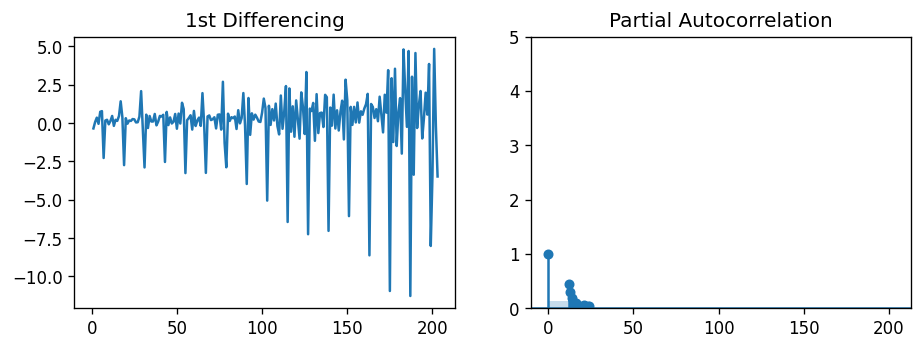

In [7]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()


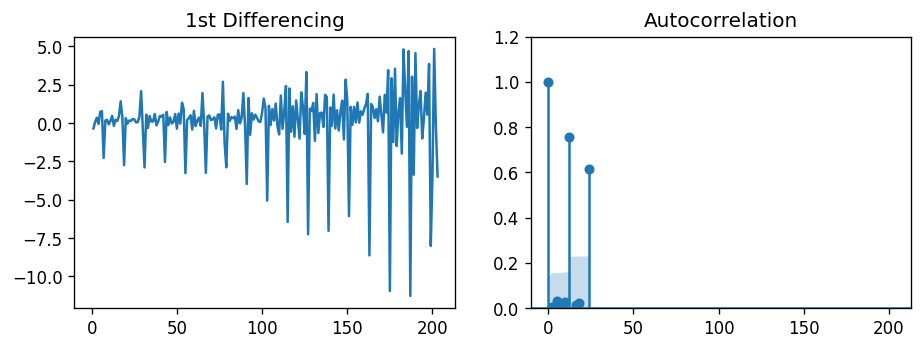

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()


In [9]:
# Build the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -417.781
Method:                       css-mle   S.D. of innovations              1.889
Date:                Wed, 05 May 2021   AIC                            845.561
Time:                        00:25:37   BIC                            862.127
Sample:                             1   HQIC                           852.263
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0964      0.017      5.655      0.000       0.063       0.130
ar.L1.D.value     0.4019      0.173      2.319      0.020       0.062       0.742
ma.L1.D.value    -1.0114      0.178     

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.919
Method:                       css-mle   S.D. of innovations              1.890
Date:                Wed, 05 May 2021   AIC                            843.838
Time:                        00:27:03   BIC                            857.091
Sample:                             1   HQIC                           849.200
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.017      5.650      0.000       0.063       0.130
ar.L1.D.value     0.3140      0.075      4.183      0.000       0.167       0.461
ma.L1.D.value    -0.9164      0.026    -

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarni

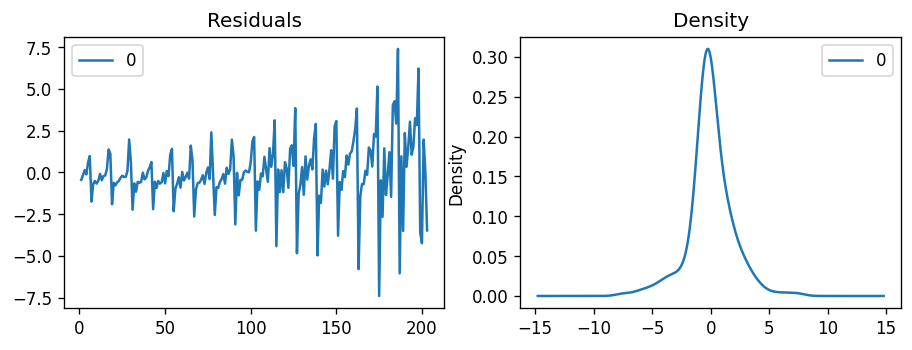

In [11]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

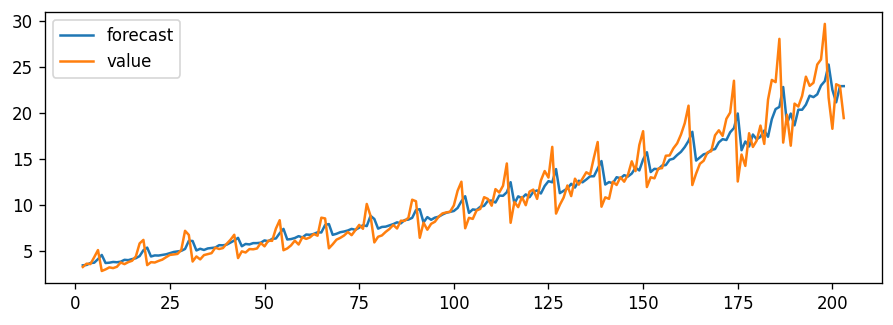

In [12]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [13]:
# Find the optimal ARIMA model using Out-of-Time Cross validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarni

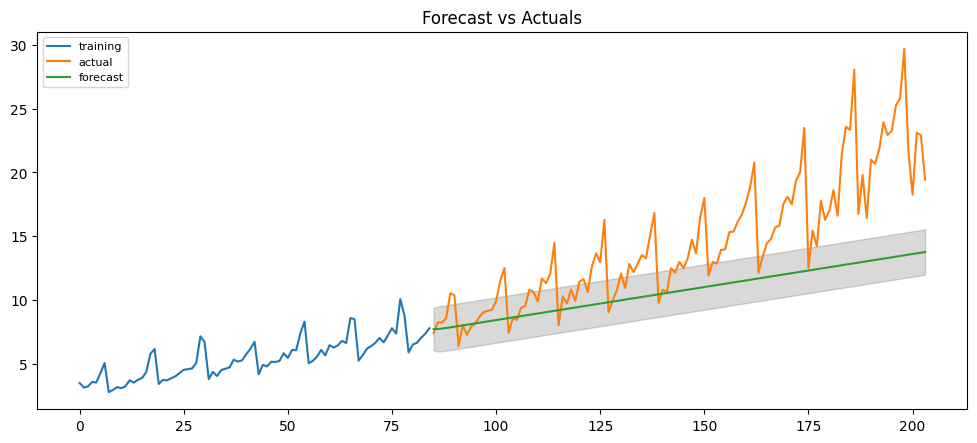

In [14]:
# Build Model
# model = ARIMA(train, order=(3,2,1))
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit(disp=-1)

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarni

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.885
Method:                       css-mle   S.D. of innovations              0.956
Date:                Wed, 05 May 2021   AIC                            245.771
Time:                        00:29:45   BIC                            260.284
Sample:                             2   HQIC                           251.601
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.346e-05      0.003      0.020      0.984      -0.005       0.005
ar.L1.D2.value    -0.2204      0.110     -2.008      0.045      -0.436      -0.005
ar.L2.D2.value    -0.3436      0.104

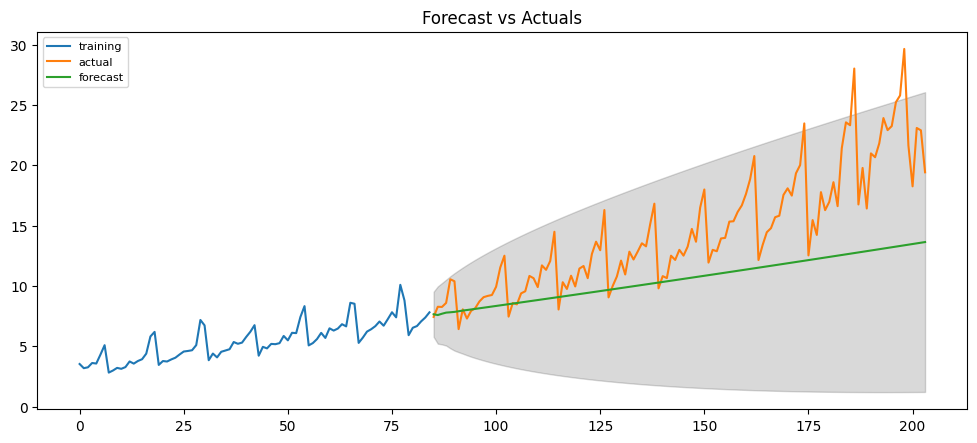

In [15]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [16]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.23226556530187778,
 'me': -3.868537492501019,
 'mae': 3.9661809692278913,
 'mpe': -0.21932214779489484,
 'rmse': 5.271776271225115,
 'acf1': 0.6896050051437129,
 'corr': 0.8760685200950092,
 'minmax': 0.23149857707247312}

In [17]:
#Auto Arima Forecasting in Python
!pip install pmdarima

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached urllib3-1.26.4-py2.py3-none-any.whl (153 kB)
  Using cached Cython-0.29.23-cp39-cp39-win_amd64.whl (1.7 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Administrator\\PycharmProjects\\ARIMA_TimeSeries\\venv\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Check the permissions.



In [18]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=0.70 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=1.92 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=860.862, Time=2.10 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit 

c:\users\administrator\pycharmprojects\arima_timeseries\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


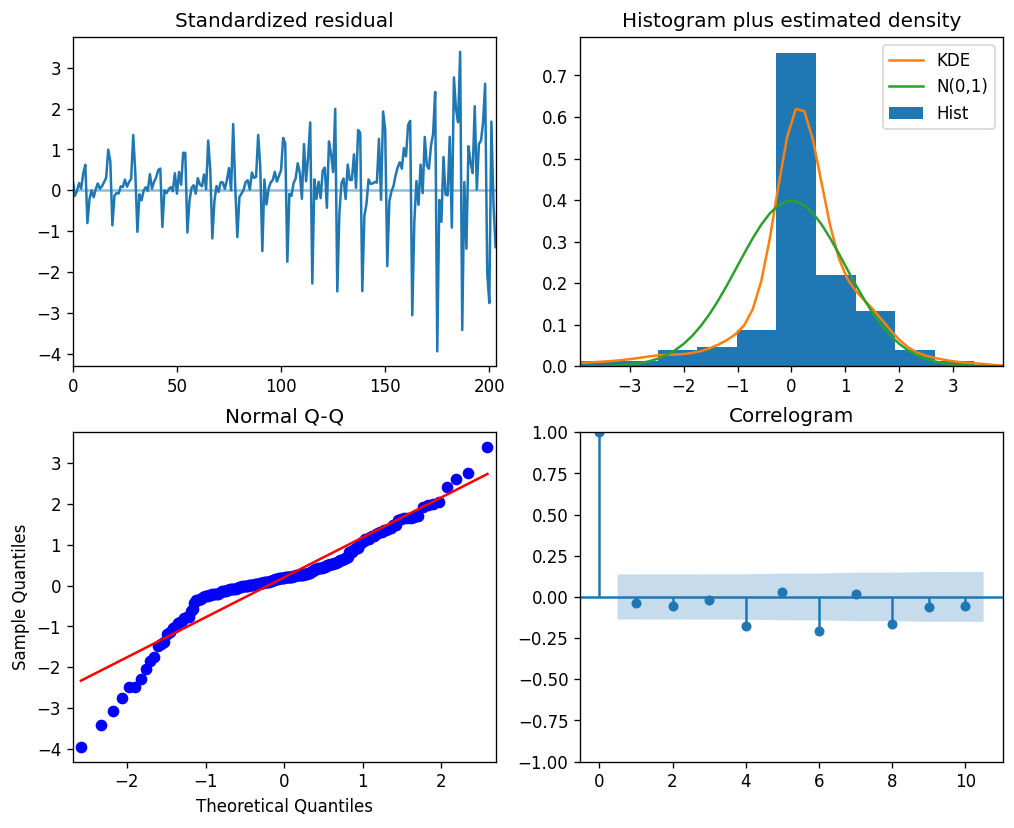

In [19]:
#How to interpret the residual plots in ARIMA model
model.plot_diagnostics(figsize=(10,8))
plt.show()

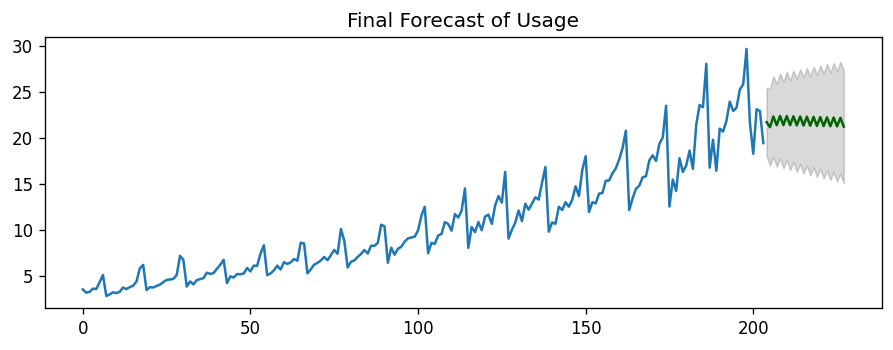

In [20]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

SARIMA model in python

In [21]:
data = pd.read_csv('C:/Users/Administrator/PycharmProjects/ARIMA_TimeSeries/dataset.txt', parse_dates=['date'], index_col='date')

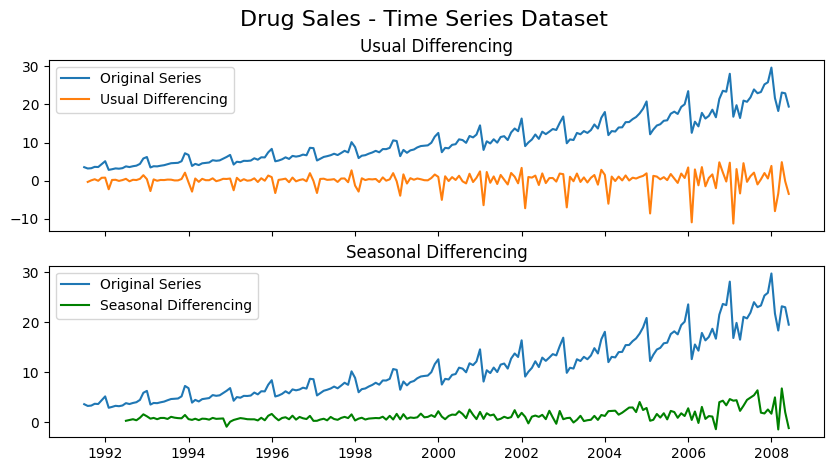

In [22]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

In [23]:
# !pip3 install pyramid-arima (already done)
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.24 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=4.61 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.05 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.797, Time=4.35 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.40 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.34 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.27 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -254.176
Date:                                 Wed, 05 May 2021   AIC                            522.352
Time:                                         00:51:02   BIC                            545.155
Sample:                                              0   HQIC                           531.588
                                                 - 204                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6750      0.068      9.958      0.000       0.542       0.808
ar.L2          0.3149      0.063      4.993      0.000       0.191       0.439
ma.L1         -0.6390      0.062    -10.333      0.000      -0.760      -0.518
ar.S.L12       0.8484      0.152      5.575      0.000       0.550       1.147
ma.S.L12      -1.5857      0.174     -9.125      0.000      -1.926      -1.245
ma.S.L24       0.7618      0.109      6.980      0.000       0.548       0.976
sigma2         0.7455      0.068     10.988      0.000       0.613       0.879
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               197.88
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              15.44   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

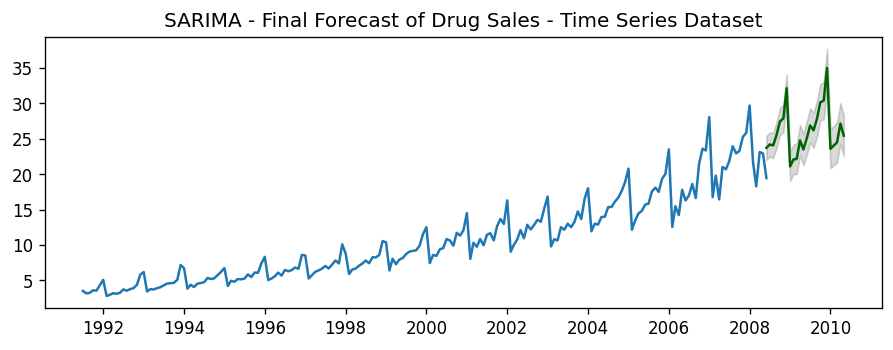

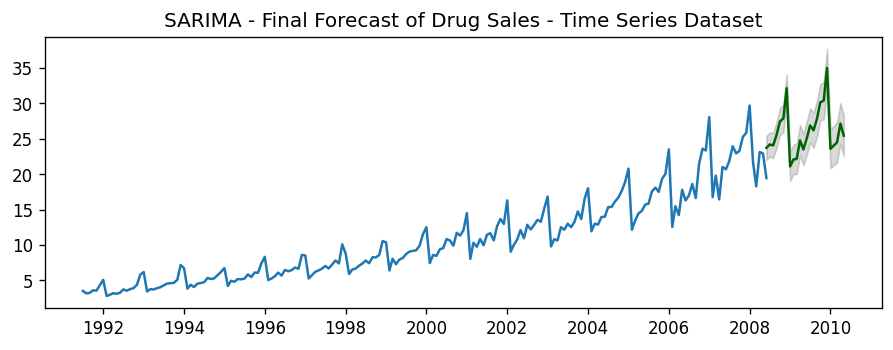

In [25]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [26]:
# SARIMAX model with exogeneous variables
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative',
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

In [27]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=2.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.37 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=4.48 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=2.28 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=539.873, Time=6.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.29 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=1.10 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.34 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.951
Date:                            Wed, 05 May 2021   AIC                            525.903
Time:                                    00:53:59   BIC                            555.220
Sample:                                07-01-1991   HQIC                           537.776
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0052      0.009      0.578      0.563      -0.012       0.023
seasonal_index  1.323e-06   4665.913   2.83e-10      1.000   -9145.021    9145.021
ar.L1              0.9767      0.018     52.998      0.000       0.941       1.013
ma.L1             -0.9114      0.057    -16.071      0.000      -1.023      -0.800
ma.L2              0.2163      0.059      3.677      0.000       0.101       0.332
ar.S.L12           0.8424      0.155      5.438      0.000       0.539       1.146
ma.S.L12          -1.5847      0.176     -8.980      0.000      -1.931      -1.239
ma.S.L24           0.7673      0.111      6.905      0.000       0.550       0.985
sigma2             0.7468      0.066     11.344      0.000       0.618       0.876
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               142.55
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

End